# 1. Variáveis e Pacotes que serão utilizadas

#### As seguintes variáveis serão utilizadas
- v1 = Possível score ou categoria (0, 0.693147, 1.098612, 1.386294, 1.609438, 1.791759, 1.945910, 2.079442, 2.197225)
- v2 = Possível idade (valor numérico - float)
- v3 = Possível categoria (1, 2, 3)
- v4 = Possível valor monetário (valor numérico - float)
- v6 = Valores numéricos com grande incidência do valor 0
- v7 = Valores numéricos com grande incidência do valor 0
- v8 = Valores numéricos com grande incidência do valor 0

In [199]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from collections import Counter
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
import os
os.chdir('C:/Users/DPL/Desktop/Projetos e Trabalhos/SICOOB')
os.getcwd()

'C:\\Users\\DPL\\Desktop\\Projetos e Trabalhos\\SICOOB'

In [80]:
df_completo = pd.read_excel('dados.xlsx', sheet_name='Planilha1')

In [81]:
var_selected = ['v1',
                'v2',
                'v3',
                'v4',
                'v6',
                'v7',
                'v8',
                'target']

df = df_completo[var_selected]

In [82]:
df.dtypes

v1        float64
v2          int64
v3          int64
v4        float64
v6        float64
v7        float64
v8        float64
target      int64
dtype: object

# 2. Preparação dos dados
 - Transformar variáveis categóricas de float para object
 - Criação de novas variáveis
 - Tratamento de outliers
 - Transformação de variáveis com o tipo dummy
 - Particionando a base de dados
 - Tratando os Outliers
 - Normalizando os Dados
 - Balanceado os Dados

## 2.1. Transformar variáveis categóricas de float para object

In [83]:
to_object = [
            'v1',
            'v3',
            'v6',
            'target']

for i in to_object:
    df[i] = df[i].astype("object")

<ipython-input-83-98a1ee6d1989>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].astype("object")


In [84]:
df[to_object].dtypes

v1        object
v3        object
v6        object
target    object
dtype: object

In [87]:
categorical = df.select_dtypes(include='object')

for i in categorical.columns:
    print(f"{i}: \n {df[i].value_counts().sort_index()}\n\n")

v1: 
 0.000000    7487
0.693147    1175
1.098612     875
1.386294     348
1.609438      79
1.791759      21
1.945910       8
2.079442       4
2.197225       3
Name: v1, dtype: int64


v3: 
 1    3767
2    5271
3     962
Name: v3, dtype: int64


v6: 
 0.00       9542
140.14        1
409.31        1
623.42        1
654.13        1
           ... 
2639.96       1
2674.22       1
2718.66       1
2752.96       1
3094.91       1
Name: v6, Length: 459, dtype: int64


target: 
 0    8850
1    1150
Name: target, dtype: int64


v1G: 
 0.0    7487
1.0    2513
Name: v1G, dtype: int64




## 2.2. Criação de novas vairáveis

### 2.2.1 v1 agrupada

Na variável v1 há grande cocentração de informações com valor 0, e os demais acima de 0 com classes muito menores, desta maneira irei agrupar os valores acima de 0 no valor 1

In [86]:
df['v1G'] = df['v1']
df['v1G'].values[df['v1G'] > 0] = 1

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      10000 non-null  object 
 1   v2      10000 non-null  int64  
 2   v3      10000 non-null  object 
 3   v4      10000 non-null  float64
 4   v6      10000 non-null  object 
 5   v7      10000 non-null  float64
 6   v8      10000 non-null  float64
 7   target  10000 non-null  object 
 8   v1G     10000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 703.2+ KB


### 2.2.2 v6 agrupada

Assim como a variável v1, a variável v6 possui muitos registros com o valor 0 e os demais pulverizados em classes menores. Irei agrupar os valores diferentes de 0 no valor 1.

In [88]:
df['v6G'] = df['v6']
df['v6G'].values[df['v6G'] > 0] = 1

In [89]:
df.drop('v1', axis=1, inplace=True)
df.drop('v6', axis=1, inplace=True)

In [90]:
categorical = df.select_dtypes(include='object')

for i in categorical.columns:
    print(f"{i}: \n {df[i].value_counts().sort_index()}\n\n")

v3: 
 1    3767
2    5271
3     962
Name: v3, dtype: int64


target: 
 0    8850
1    1150
Name: target, dtype: int64


v1G: 
 0.0    7487
1.0    2513
Name: v1G, dtype: int64


v6G: 
 0.0    9542
1.0     458
Name: v6G, dtype: int64




In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v2      10000 non-null  int64  
 1   v3      10000 non-null  object 
 2   v4      10000 non-null  float64
 3   v7      10000 non-null  float64
 4   v8      10000 non-null  float64
 5   target  10000 non-null  object 
 6   v1G     10000 non-null  object 
 7   v6G     10000 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


## 2.3. Transformação de variáveis com o tipo dummy

In [92]:
categorical = df.select_dtypes(include='object')
numerical = df.select_dtypes(include='number')


df_enc = pd.DataFrame()
df_d = pd.DataFrame()

for cat in categorical.columns:
    df_dt = pd.get_dummies(df[cat], prefix=cat, drop_first=True)
    df_d = pd.concat([df_d, df_dt], axis = 1)
df_enc = pd.concat([df_d, df[numerical.columns]], axis = 1)

In [93]:
df_enc

,v3_2,v3_3,target_1,v1G_1.0,v6G_1.0,v2,v4,v7,v8
0,0,0,0,1,0,50,1724.61,729.07,765.69
1,1,0,0,0,0,41,2198.59,0.00,0.00
2,1,0,0,1,0,39,1633.05,915.17,1108.55
3,0,0,0,0,0,66,2111.51,881.79,1317.67
4,0,0,0,0,0,42,1632.38,898.72,170.96
...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,31,1745.30,962.30,1500.79
9996,0,0,0,0,0,20,1796.90,1003.20,1694.07
9997,1,0,0,0,0,38,1594.14,1049.75,0.00
9998,1,0,0,1,0,37,1730.00,688.62,1365.72


In [94]:
df_d.columns.values.tolist()

['v3_2', 'v3_3', 'target_1', 'v1G_1.0', 'v6G_1.0']

In [95]:
numerical.columns.values.tolist()

['v2', 'v4', 'v7', 'v8']

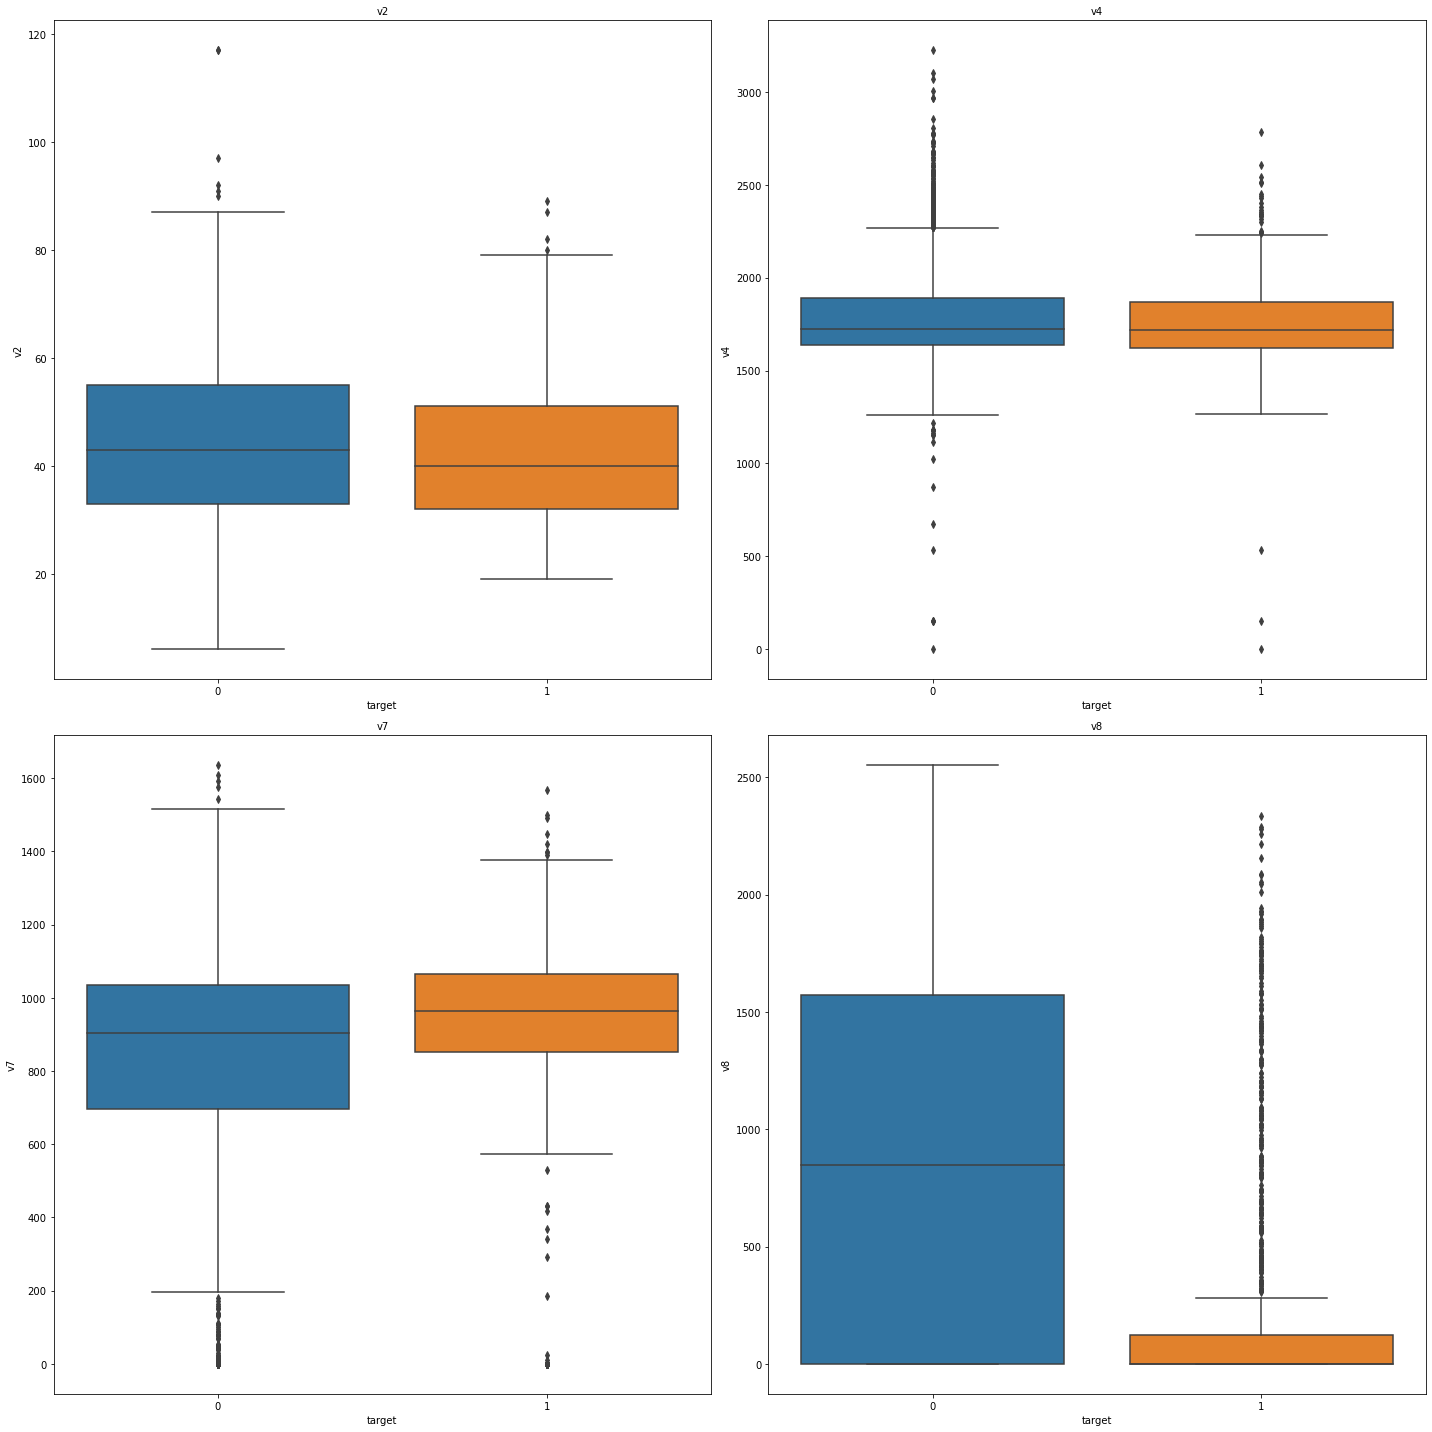

In [98]:
numerical = df.select_dtypes(include='number')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in numerical.columns:
    idx += 1
    plt.subplot(2, 2, idx)
    sns.boxplot(y=df[col], x='target', data=df)
    plt.title(col, fontsize=10)
plt.tight_layout()

#### Observa-se grande quantidade de outliers, estes serão tratados e os dados normalizados

## 2.4. Particionando a base de dados

In [99]:
y = df_enc['target_1']
x = df_enc.drop(['target_1'], axis=1).copy()

In [100]:
feature_names = x.columns
feature_names

Index(['v3_2', 'v3_3', 'v1G_1.0', 'v6G_1.0', 'v2', 'v4', 'v7', 'v8'], dtype='object')

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.25, random_state=54)

In [102]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7500, 8), (7500,), (2500, 8), (2500,))

## 2.5. Tratando os Outliers

In [103]:
for col in numerical.columns:
    q1 = x_train[col].quantile(0.25)
    q3 = x_train[col].quantile(0.75)
    upper_lim = q3 + 1.5*(q3 - q1)
    print(col, q1, q3, x_train[col].max(), upper_lim, x_train[col].quantile(0.95))
    x_train[col] = np.where(x_train[col] > upper_lim, upper_lim, x_train[col])
    
    q1 = x_test[col].quantile(0.25)
    q3 = x_test[col].quantile(0.75)
    upper_lim = q3 + 1.5*(q3 - q1)
    print(col, q1, q3, x_test[col].max(), upper_lim, x_test[col].quantile(0.95))
    x_test[col] = np.where(x_test[col] > upper_lim, upper_lim, x_test[col])

v2 33.0 54.0 117 85.5 69.0
v2 33.0 54.0 117 85.5 68.0
v4 1634.65 1889.7350000000001 3223.21 2272.3625 2190.3095
v4 1634.65 1890.86 3103.82 2275.1749999999997 2179.314
v7 724.5675 1037.795 1608.4 1507.6362500000002 1203.651
v7 729.5575000000001 1038.225 1635.8 1501.2262499999997 1211.5399999999997
v8 0.0 1522.7450000000001 2552.69 3806.8625 2021.3664999999994
v8 0.0 1543.7925 2538.85 3859.4812500000003 2030.9044999999999


## 2.6. Normalizando os Dados

In [104]:
# MinMaxScaler
mm = MinMaxScaler()
x_train_mm = mm.fit_transform(x_train)
x_test_mm = mm.transform(x_test)

## 2.7. Balanceado os Dados

##### Nesta parte utilizarei dois algorítimos para realziar o balanceamento da base de dados, pois há uma quantidade muito grande de valores 0 na variável target em comparação com os valores 0 na mesma. Os resultados de cada um destes modos de balanceamentos serão utilizados nos modelos adiante

### 2.7.1. Oversampling - Smote

In [105]:
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=54)
x_over_mm, y_over_mm = sm.fit_resample(x_train_mm, y_train)
print('MM dataset shape after SMOTE %s' % Counter(y_over_mm))

Original dataset shape Counter({0: 6638, 1: 862})
MM dataset shape after SMOTE Counter({1: 6638, 0: 6638})


### 2.7.2. Undersampling - RandomUnderSampling

In [106]:
print('Original dataset shape %s' % Counter(y_train))
sm = RandomUnderSampler()
x_under_mm, y_under_mm = sm.fit_resample(x_train_mm, y_train)
print('MM dataset shape after RandomUnderSampler %s' % Counter(y_under_mm))

Original dataset shape Counter({0: 6638, 1: 862})
MM dataset shape after RandomUnderSampler Counter({0: 862, 1: 862})


# 3. Criação de Modelos

## 3.1. Árvore de Decisão (Decision Tree)

### 3.1.1. Árvore de Decisão com dados do Undersampling

In [107]:
base_estimator = DecisionTreeClassifier(random_state=54)

param_grid = {
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [4, 5, 6, 7, 8, None],
    "criterion": ["gini", "entropy"],
}

grid_search_dt_under = GridSearchCV(estimator=base_estimator, param_grid=param_grid, cv=5, verbose=True)
grid_search_dt_under.fit(x_under_mm, y_under_mm)
dt_under = grid_search_dt_under.best_estimator_
scores = cross_val_score(grid_search_dt_under.best_estimator_, x_under_mm, y_under_mm, cv=20, scoring="f1")
score_mean = np.mean(scores)
print("Mean of cross-validation: ", score_mean)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mean of cross-validation:  0.7527909975852387


In [108]:
grid_search_dt_under.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='log2', random_state=54)

In [109]:
y_pred_under = dt_under.predict(x_test)
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79      2212
           1       0.23      0.76      0.35       288

    accuracy                           0.68      2500
   macro avg       0.59      0.72      0.57      2500
weighted avg       0.87      0.68      0.74      2500



C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


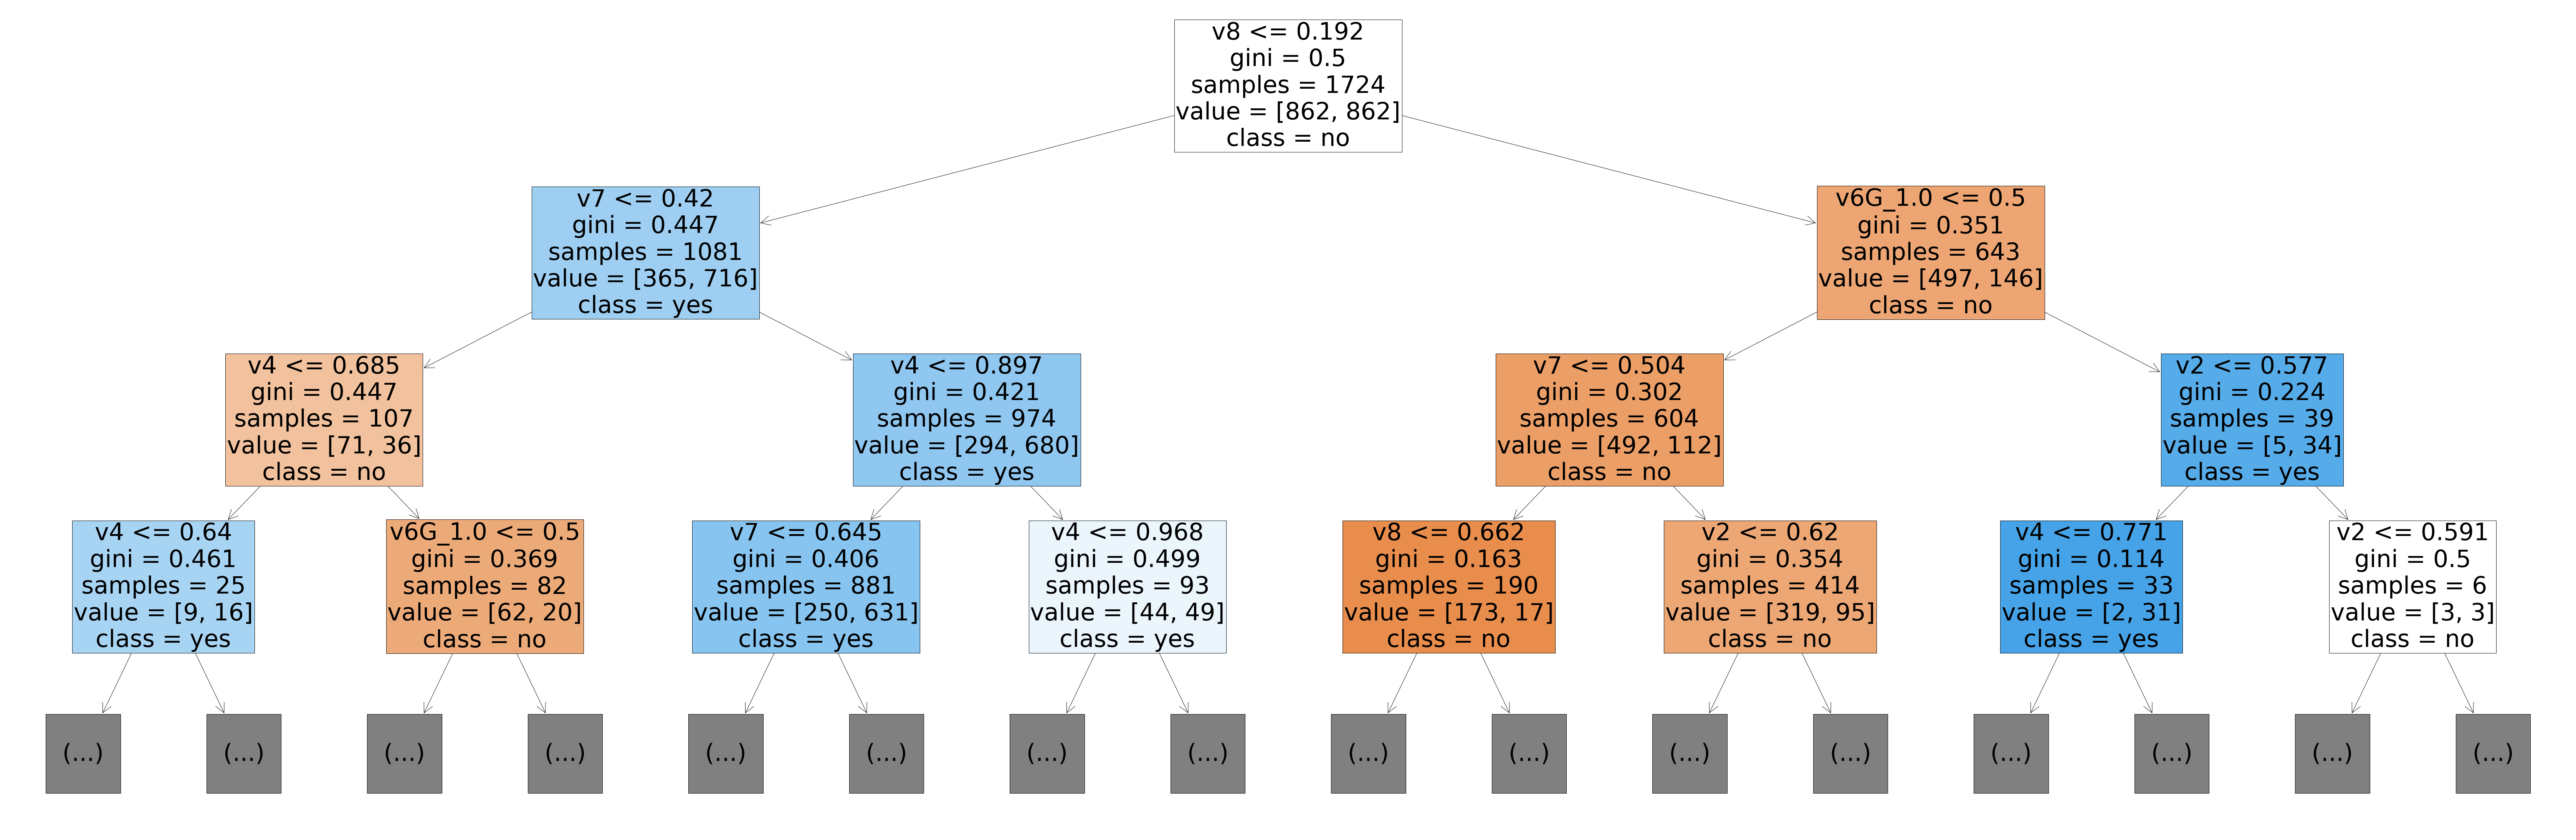

In [110]:
plt.figure(figsize=(120, 40))

plot_tree(dt_under, max_depth=3, class_names=['no', 'yes'],fontsize=62, feature_names=x.columns, filled=True)

plt.show()

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


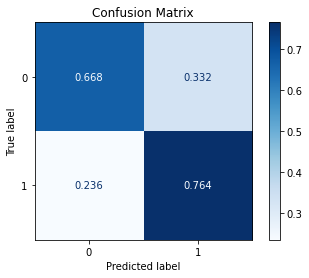

In [111]:
plot_confusion_matrix(
    dt_under, x_test, y_test, values_format=".3g", cmap="Blues", normalize="true"
)
plt.title("Confusion Matrix")
plt.show()

[0.         0.         0.         0.15253116 0.02530452 0.06427191
 0.13995044 0.61794197]


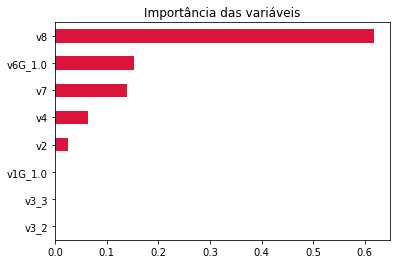

In [113]:
print(dt_under.feature_importances_)
feat_importances = pd.Series(dt_under.feature_importances_, index=feature_names)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color = 'crimson')
plt.title("Importância das variáveis")
plt.show()

### 3.1.2. Árvore de Decisão com dados do Oversampling

In [114]:
base_estimator = DecisionTreeClassifier(random_state=54)

param_grid = {
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [4, 5, 6, 7, 8, None],
    "criterion": ["gini", "entropy"],
}

grid_search_dt_over = GridSearchCV(estimator=base_estimator, param_grid=param_grid, cv=5, verbose=True)
grid_search_dt_over.fit(x_over_mm, y_over_mm)
dt_over = grid_search_dt_over.best_estimator_
scores = cross_val_score(grid_search_dt_over.best_estimator_, x_over_mm, y_over_mm, cv=20, scoring="f1")
score_mean = np.mean(scores)
print("Mean of cross-validation: ", score_mean)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mean of cross-validation:  0.8323478480568893


In [115]:
grid_search_dt_over.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=54)

In [116]:
y_pred_over = dt_over.predict(x_test)
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2212
           1       0.84      0.28      0.42       288

    accuracy                           0.91      2500
   macro avg       0.88      0.64      0.69      2500
weighted avg       0.91      0.91      0.89      2500



C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


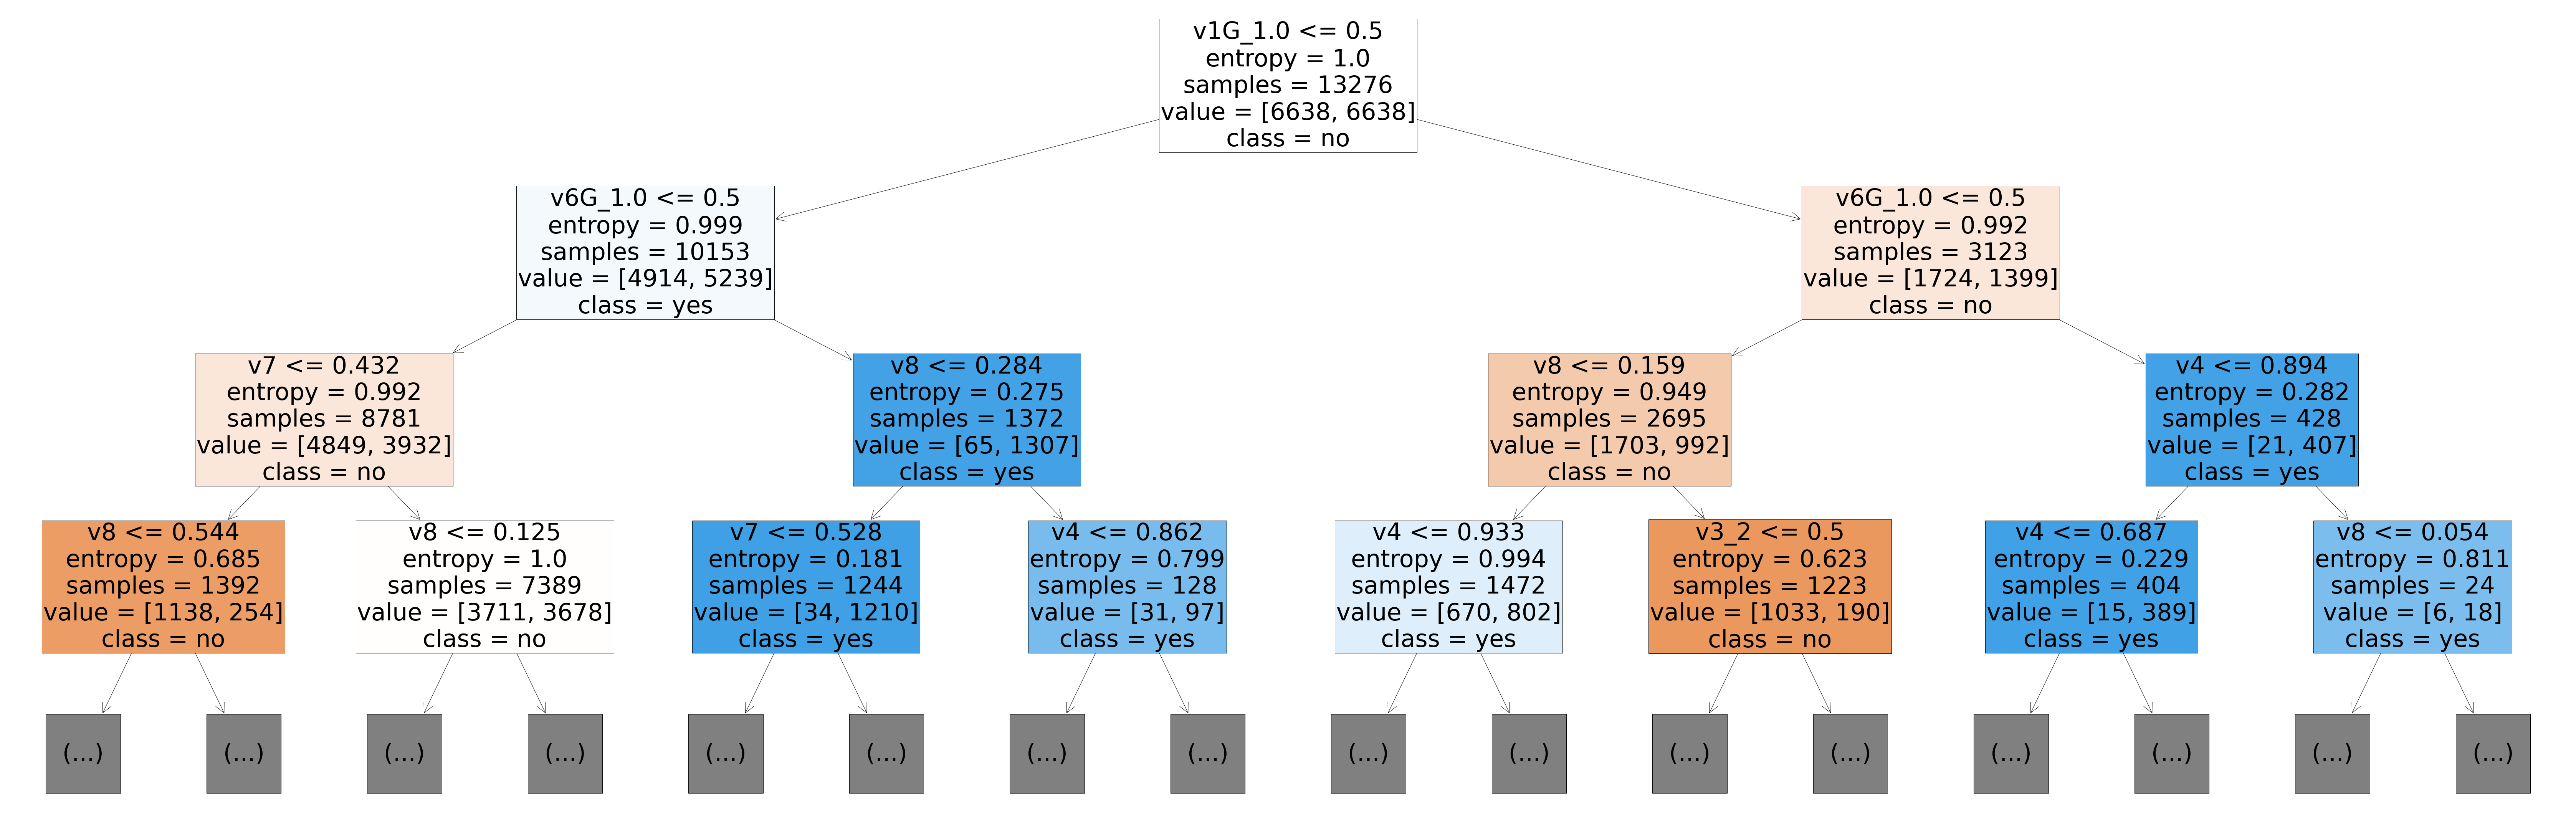

In [117]:
plt.figure(figsize=(120, 40))

plot_tree(dt_over, max_depth=3, class_names=['no', 'yes'],fontsize=62, feature_names=x.columns, filled=True)

plt.show()

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


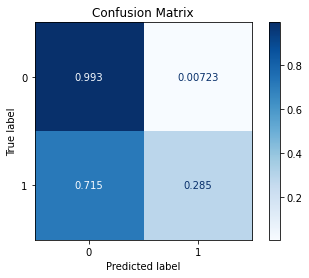

In [118]:
plot_confusion_matrix(
    dt_over, x_test, y_test, values_format=".3g", cmap="Blues", normalize="true"
)
plt.title("Confusion Matrix")
plt.show()

[0.01540733 0.00909315 0.00240638 0.1111637  0.23093535 0.20430249
 0.2153603  0.21133131]


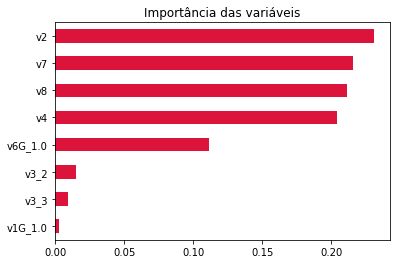

In [119]:
print(dt_over.feature_importances_)
feat_importances = pd.Series(dt_over.feature_importances_, index=feature_names)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color = 'crimson')
plt.title("Importância das variáveis")
plt.show()

## 3.2. Random Forest

### 3.2.1. Random Forest com dados do Undersampling

In [120]:
base_estimator = RandomForestClassifier(random_state=54)

param_grid = {
    "n_estimators": [100, 200, 500],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [4, 5, 6, 7, 8, None],
    "criterion": ["gini", "entropy"],
}

grid_search_rf_under = GridSearchCV(estimator=base_estimator, param_grid=param_grid, cv=5, verbose=True)
grid_search_rf_under.fit(x_under_mm, y_under_mm)
rf_under = grid_search_rf_under.best_estimator_
scores = cross_val_score(grid_search_rf_under.best_estimator_, x_under_mm, y_under_mm, cv=20, scoring="f1")
score_mean = np.mean(scores)
print("Mean of cross-validation: ", score_mean)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mean of cross-validation:  0.7448930822537569


In [121]:
grid_search_rf_under.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       random_state=54)

In [122]:
y_pred_under = rf_under.predict(x_test)
print(classification_report(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.95      0.67      0.78      2212
           1       0.22      0.73      0.34       288

    accuracy                           0.67      2500
   macro avg       0.59      0.70      0.56      2500
weighted avg       0.87      0.67      0.73      2500



C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


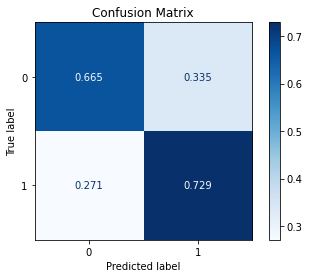

In [123]:
plot_confusion_matrix(
    rf_under, x_test, y_test, values_format=".3g", cmap="Blues", normalize="true"
)
plt.title("Confusion Matrix")
plt.show()

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


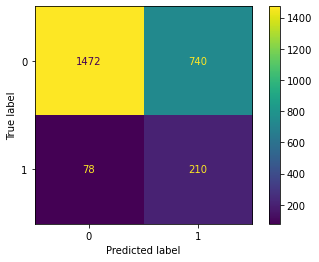

In [124]:
plot_confusion_matrix(rf_under, x_test, y_test)

[0.01642776 0.00854578 0.01491329 0.21713973 0.11318999 0.12921099
 0.17521071 0.32536175]


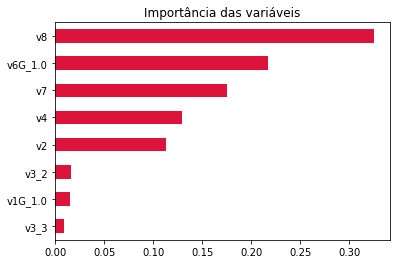

In [125]:
print(rf_under.feature_importances_)
feat_importances = pd.Series(rf_under.feature_importances_, index=feature_names)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color = 'crimson')
plt.title("Importância das variáveis")
plt.show()

### 3.2.2. Random Forest com dados do Oversampling

In [126]:
base_estimator = RandomForestClassifier(random_state=54)

param_grid = {
    "n_estimators": [100, 200, 500],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [4, 5, 6, 7, 8, None],
    "criterion": ["gini", "entropy"],
}

grid_search_rf_over = GridSearchCV(estimator=base_estimator, param_grid=param_grid, cv=5, verbose=True)
grid_search_rf_over.fit(x_over_mm, y_over_mm)
rf_over = grid_search_rf_over.best_estimator_
scores = cross_val_score(grid_search_rf_over.best_estimator_, x_over_mm, y_over_mm, cv=20, scoring="f1")
score_mean = np.mean(scores)
print("Mean of cross-validation: ", score_mean)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mean of cross-validation:  0.8975687212879674


In [127]:
grid_search_rf_over.best_estimator_

RandomForestClassifier(n_estimators=500, random_state=54)

In [128]:
y_pred_over = rf_over.predict(x_test)
print(classification_report(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2212
           1       0.39      0.35      0.37       288

    accuracy                           0.86      2500
   macro avg       0.65      0.64      0.65      2500
weighted avg       0.86      0.86      0.86      2500



C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


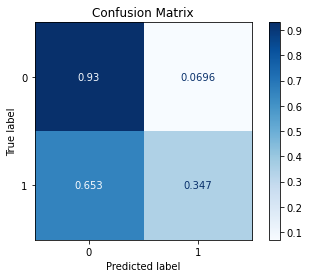

In [129]:
plot_confusion_matrix(
    rf_over, x_test, y_test, values_format=".3g", cmap="Blues", normalize="true"
)
plt.title("Confusion Matrix")
plt.show()

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


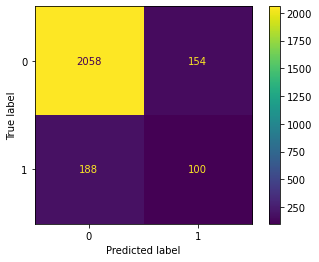

In [130]:
plot_confusion_matrix(rf_over, x_test, y_test)

[0.01422995 0.00814549 0.01445981 0.0922197  0.20806785 0.19398962
 0.21876493 0.25012265]


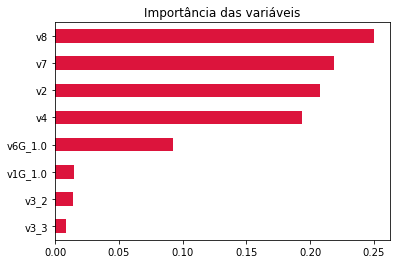

In [131]:
print(rf_over.feature_importances_)
feat_importances = pd.Series(rf_over.feature_importances_, index=feature_names)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color = 'crimson')
plt.title("Importância das variáveis")
plt.show()

## 3.3. XGBOOST

### 3.3.1. XGBOOST com dados do Undersampling

In [135]:
xgb_cl = xgb.XGBClassifier()
print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [ ]:
# Init classifier
xgb_cl = xgb.XGBClassifier()

In [148]:
# Fit
xgboost_under = xgb_cl.fit(x_under_mm, y_under_mm)


C:\Users\DPL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:25:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [142]:
# Predict
preds = xgb_cl.predict(x_test)

In [143]:
accuracy_score(y_test, preds)

0.6596

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


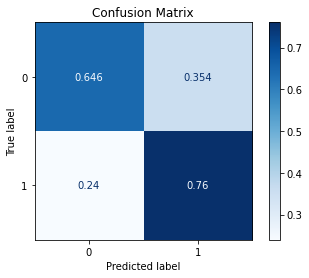

In [149]:
plot_confusion_matrix(
    xgboost_under, x_test, y_test, values_format=".3g", cmap="Blues", normalize="true"
)
plt.title("Confusion Matrix")
plt.show()

[0.03602381 0.03707779 0.06407429 0.58694696 0.04822616 0.05135059
 0.05343028 0.12287012]


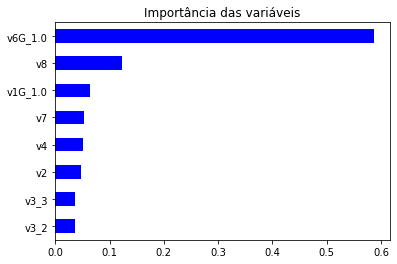

In [151]:
print(xgboost_under.feature_importances_)
feat_importances = pd.Series(xgboost_under.feature_importances_, index=feature_names)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color = 'blue')
plt.title("Importância das variáveis")
plt.show()

### 3.3.2. XGBOOST com dados do Oversampling

In [152]:
xgboost_over = xgb_cl.fit(x_over_mm, y_over_mm)

C:\Users\DPL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:29:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [153]:
# Predict
preds = xgb_cl.predict(x_test)

In [154]:
accuracy_score(y_test, preds)

0.7568

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


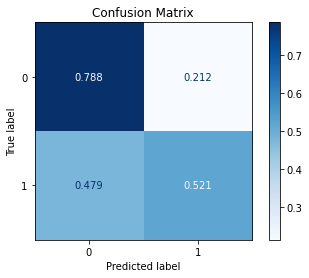

In [155]:
plot_confusion_matrix(
    xgboost_over, x_test, y_test, values_format=".3g", cmap="Blues", normalize="true"
)
plt.title("Confusion Matrix")
plt.show()

[0.02760083 0.03348921 0.02924902 0.6284613  0.08819469 0.03209531
 0.03109413 0.12981556]


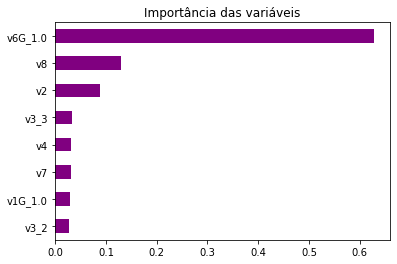

In [156]:
print(xgboost_over.feature_importances_)
feat_importances = pd.Series(xgboost_over.feature_importances_, index=feature_names)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color = 'purple')
plt.title("Importância das variáveis")
plt.show()

### 3.3.4. Ajustando os parâmetros do modelo XGBoost

In [157]:
xgb_cl

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [158]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [160]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

In [161]:
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

In [162]:
_ = grid_cv.fit(x, y)

C:\Users\DPL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:32:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [163]:
grid_cv.best_score_

0.8213500328675636

In [164]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'reg_lambda': 1,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [167]:
final_XGBoostcl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic"
)

### 3.3.4.1. Modelo XGBoost Com melhores parâmetros para os dados Undersampling

In [168]:
xgboostBest_under = final_XGBoostcl.fit(x_under_mm, y_under_mm)

[14:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [169]:
preds = final_XGBoostcl.predict(x_test)

In [170]:
accuracy_score(y_test, preds)

0.652

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


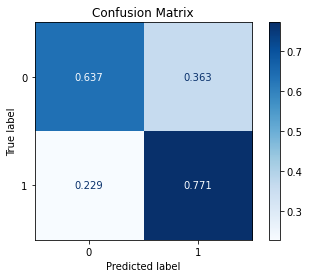

In [172]:
plot_confusion_matrix(
    xgboostBest_under, x_test, y_test, values_format=".3g", cmap="Blues", normalize="true"
)
plt.title("Confusion Matrix")
plt.show()

[0.03865818 0.04100286 0.06305979 0.27909917 0.07274538 0.06251706
 0.12071197 0.3222056 ]


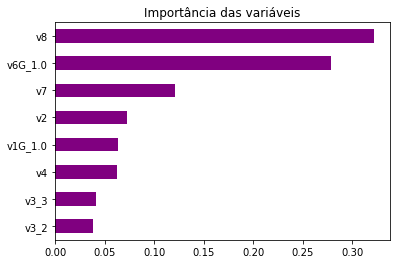

In [173]:
print(xgboostBest_under.feature_importances_)
feat_importances = pd.Series(xgboostBest_under.feature_importances_, index=feature_names)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color = 'purple')
plt.title("Importância das variáveis")
plt.show()

### 3.3.4.2. Modelo XGBoost Com melhores parâmetros para os dados Oversampling

In [174]:
xgboostBest_over = final_XGBoostcl.fit(x_over_mm, y_over_mm)

C:\Users\DPL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:56:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [181]:
preds = final_XGBoostcl.predict(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      2212
           1       0.22      0.69      0.33       288

    accuracy                           0.68      2500
   macro avg       0.58      0.68      0.56      2500
weighted avg       0.86      0.68      0.74      2500



In [176]:
accuracy_score(y_test, preds)

0.68

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


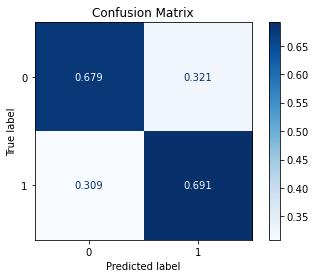

In [177]:
plot_confusion_matrix(
    xgboostBest_over, x_test, y_test, values_format=".3g", cmap="Blues", normalize="true"
)
plt.title("Confusion Matrix")
plt.show()

[0.05248342 0.03326126 0.0340326  0.28971815 0.06081314 0.05036706
 0.12237253 0.35695183]


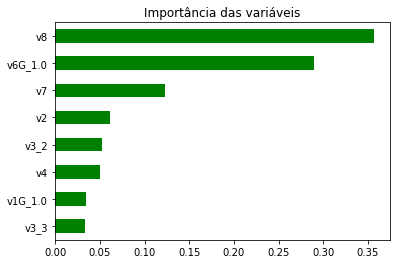

In [182]:
print(xgboostBest_over.feature_importances_)
feat_importances = pd.Series(xgboostBest_over.feature_importances_, index=feature_names)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color = 'green')
plt.title("Importância das variáveis")
plt.show()

C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\DPL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


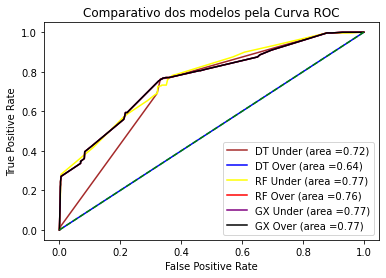

In [221]:
prob_dt_under = dt_under.predict_proba(x_test)
prob_dt_under = prob_dt_under[:, 1]
prob_dt_over = dt_over.predict_proba(x_test)
prob_dt_over = prob_dt_over[:, 1]
prob_rf_under = rf_under.predict_proba(x_test)
prob_rf_under = prob_rf_under[:, 1]
prob_rf_over = rf_over.predict_proba(x_test)
prob_rf_over = prob_rf_over[:, 1]
prob_GX_under = xgboostBest_under.predict_proba(x_test)
prob_GX_under = prob_GX_under[:, 1]
prob_GX_over = xgboostBest_over.predict_proba(x_test)
prob_GX_over = prob_GX_over[:, 1]

auc_dt_under = roc_auc_score(y_test, prob_dt_under)
auc_dt_over = roc_auc_score(y_test, prob_dt_over)
auc_rf_under = roc_auc_score(y_test, prob_rf_under)
auc_rf_over = roc_auc_score(y_test, prob_rf_over)
auc_GX_under = roc_auc_score(y_test, prob_GX_under)
auc_GX_over = roc_auc_score(y_test, prob_GX_over)

def plot_roc_curve(fper, tper):
    plt.plot(fper1, tper1, color='brown', label= "DT Under (area =" + str(round(auc_dt_under,2)) + ")")
    plt.plot(fper2, fper2, color='blue', label="DT Over (area =" + str(round(auc_dt_over,2)) + ")")
    plt.plot(fper3, tper3, color='yellow', label= "RF Under (area =" + str(round(auc_rf_under,2)) + ")")
    plt.plot(fper4, tper4, color='red', label= "RF Over (area =" + str(round(auc_rf_over,2)) + ")")
    plt.plot(fper5, tper5, color='purple', label= "GX Under (area =" + str(round(auc_GX_under,2)) + ")")
    plt.plot(fper6, tper6, color='black', label= "GX Over (area =" + str(round(auc_GX_over,2)) + ")")
    
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparativo dos modelos pela Curva ROC')
    plt.legend()
    plt.show()
    

fper1, tper1, thresholds = roc_curve(y_test, prob_dt_under)
fper2, tper2, thresholds = roc_curve(y_test, prob_dt_over)
fper3, tper3, thresholds = roc_curve(y_test, prob_rf_under)
fper4, tper4, thresholds = roc_curve(y_test, prob_rf_over)
fper5, tper5, thresholds = roc_curve(y_test, prob_rf_over)
fper6, tper6, thresholds = roc_curve(y_test, prob_rf_over)
plot_roc_curve(fper1, tper1)
